# CS-141 Homework 2

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

# Autosave work 
%load_ext autoreload
%autoreload 2
%autosave 180

Autosaving every 180 seconds



 The range in the x and y directions is (12,9) units 

(972, 1297, 3)

 The initial position vector x = [[-9]
 [ 4]] 



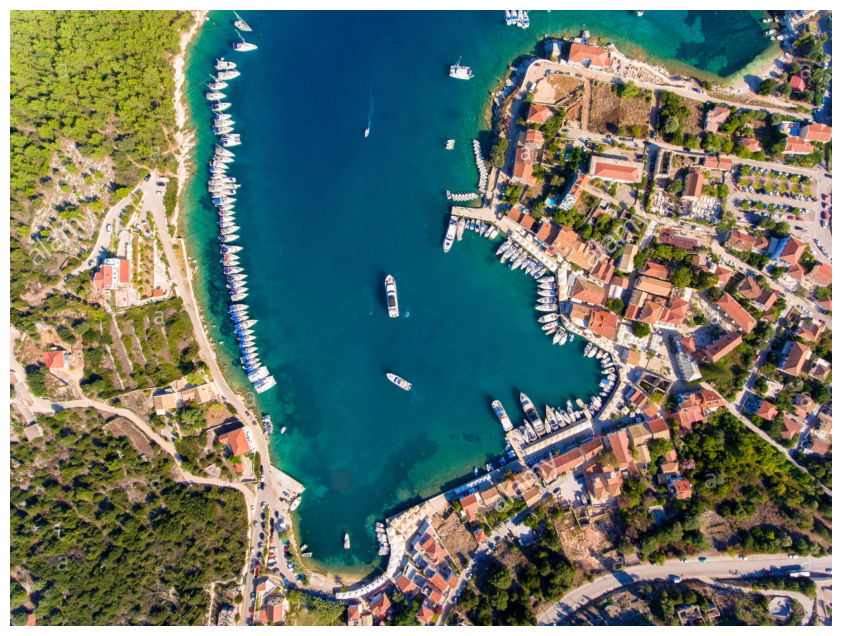

In [2]:
# Upload image of choice 
map = cv2.imread('BayMap.png')
# map = cv2.imread('CityMap.png')
# map = cv2.imread('MarioMap.png')
# print(map.shape) # printed as height, width 

# Calculate the range of the map
# NOTE: 1 unit = 50 pixels
m = 25 # images mxm pixels
dFOV = m # Field of view of the drone
sigma_movement = 5 # Movement from wind

range_x = ((map.shape[1]-dFOV)//2)//50
range_y = ((map.shape[0]-dFOV)//2)//50
print(f'\n The range in the x and y directions is ({range_x},{range_y}) units \n')

# Simulate a drone's starting position x and y
pos_x = np.random.randint(-9, 10)
# print(pos_x)
pos_y = np.random.randint(-9, 10)
# print(pos_y)
print(map.shape)
# pos_x = int(np.floor(np.random.rand()*(map.shape[1] - dFOV)))  
# pos_y = int(np.floor(np.random.rand()*(map.shape[0] - dFOV)))

state_ini = np.array([[pos_x], [pos_y]])
print(f'\n The initial position vector x = {state_ini} \n')

# Show the image
plt.figure(figsize=(15, 8))
map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.imshow(map)
plt.axis("off")
plt.show()

The selected pixel ratio is m x m, or 25 x 25


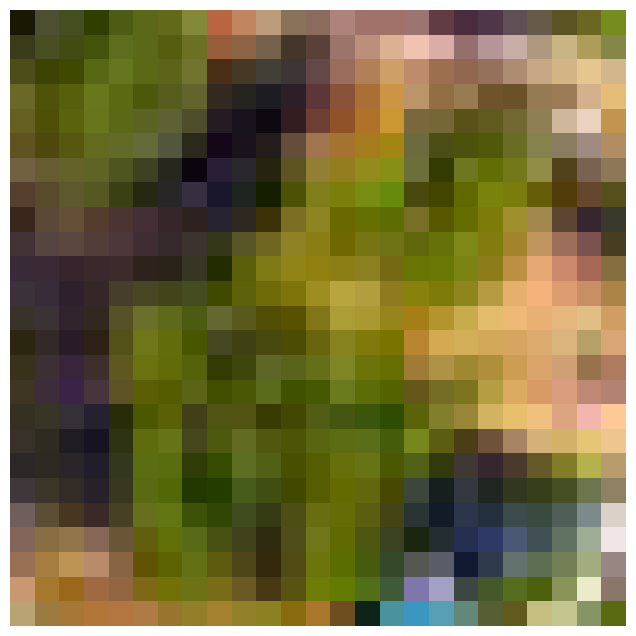

In [5]:
# Generate an RGB image for the x, y position 
# Images will be mxm pixels
# print(map.shape[1])
# print(map.shape[1]//2)

# Specify the desired dimensions to crop specific picture
width_s = (pos_x*50)
# print(width_s)
width_e = width_s + m # desired width in pixels
height_s = (pos_y*50) 
# print(height_s)
height_e = height_s + m  # desired height in pixels

print('The selected pixel ratio is m x m, or', width_e-width_s, 'x', height_e-height_s)

# Crop the image 
true_pos = map[height_s:height_e, width_s:width_e] #, height_s:height_e]
# print(true_pos.shape)


# Show the true position image
plt.figure(figsize=(15, 8))
plt.imshow(true_pos)
plt.axis("off")
plt.show()


[[-9]
 [ 4]]
[[-450]
 [ 200]]

 New position =  [[-424]
 [ 159]]


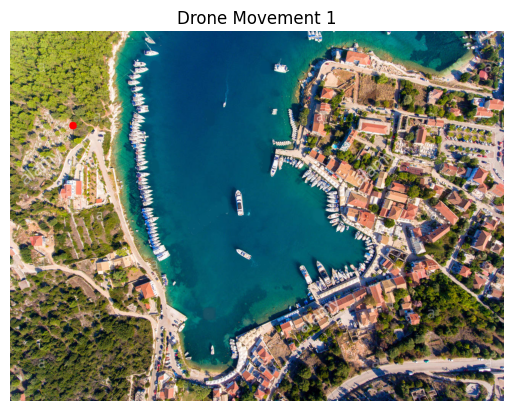

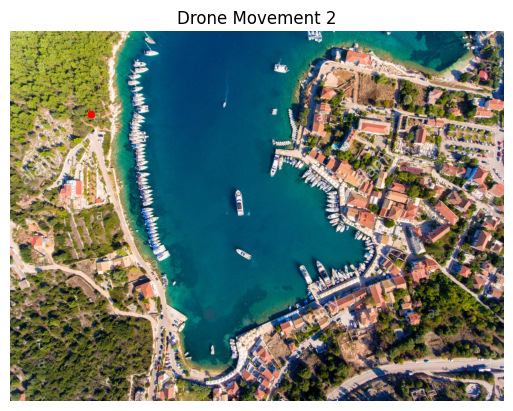

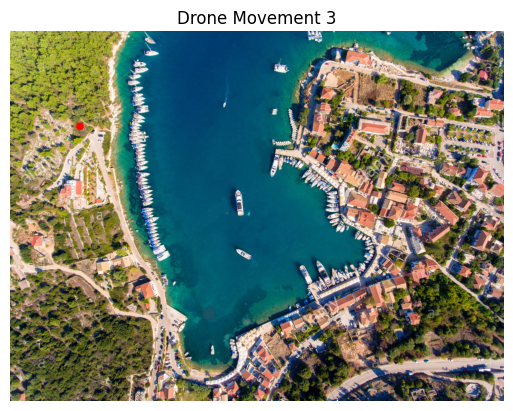

Final position =  [[-465]
 [ 236]]


In [4]:
# Generate random movement in the x and y direction


def random_movement():
    """ Generates a random movement vector in the x and y direction, 
    such that dx^2 + dy^2 = 1.0
    Inputs: none
    Outputs: dx, dy
    """
    dx = np.random.uniform(-1, 1)
    posneg = np.random.choice([-1, 1])
    dy = (np.sqrt(1-dx**2))*posneg
    return dx,dy

def move_drone(pos,map, sigma_movement = 5):
    """ 
    Moves the drone a random distance dx, dy
    while checking to make sure it is in range of the map
    Inputs: Previous position, map
    OUtputs: new position 
    """
    dx,dy = random_movement()
    # print(dx)
    # print(dy)
    move_x = int(np.floor(dx*50)) + sigma_movement
    # print(move_x)
    move_y = int(np.floor(dy*50)) + sigma_movement
    # print(move_y)
    new_pos = pos + np.array([[move_x],[move_y]])

    while new_pos[0] > (map.shape[1]//2) or new_pos[1] > (map.shape[0]//2) or new_pos[0] < (-map.shape[1]//2) or new_pos[1] < (-map.shape[0]//2):
        print("Movement rejected, generating a new movement")
        dx,dy = random_movement()
        move_x = int(np.floor(dx*50)) + sigma_movement
        move_y = int(np.floor(dy*50)) + sigma_movement
        new_pos = pos + np.array([[move_x],[move_y]])
        # print(new_pos)

    return new_pos


pos = state_ini
pos = pos*50

print(state_ini)
print(pos)

new_pos = move_drone(pos,map)
print("\n New position = ", new_pos)

# Simulate 5 movement 
for i in range(3):
    new_pos = move_drone(pos, map)
    
    # Plotting the map and the drone's new position
    display_map = map.copy()
    center_x = int(map.shape[1] / 2)  # Center of the map image
    center_y = int(map.shape[0] / 2)  # Center of the map image

    # Draw a circle at the new position (remember to adjust the coordinates)
    cv2.circle(display_map, 
               (center_x + int(new_pos[0]), center_y - int(new_pos[1])), 10, (255, 0, 0), -1)  # Red circle
    
    # Update the position for the next iteration
    pos = new_pos

    # Show the updated map
    plt.imshow(display_map)
    plt.title(f"Drone Movement {i + 1}")
    plt.axis('off')
    plt.show()

print("Final position = ", pos)





(3, 225)


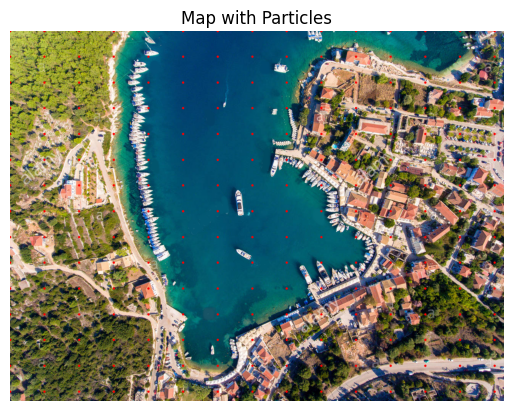

In [26]:
# Particle filter implementation
N = 15 #N*N particles, subject to change

# Generate a set P of N particles, uniformly distributed across the map 
x = np.linspace(0,map.shape[1]-dFOV,N)
y = np.linspace(0,map.shape[0]-dFOV,N)
# print(x)
# print(y)
particlePosArr = np.zeros([3,N**2]) #particle number, xpos, ypos

particleCount = 0
dispmap = map.copy()
for i in x:
    for j in y:
        particlePosArr[:, particleCount] = [particleCount, i, j]
        
        # Draw the particle on the map image
        cv2.circle(dispmap, (int(i), int(j)), 3, (255, 0, 0), -1)  # Red circles for particles
        
        particleCount += 1

print(particlePosArr.shape)

# Display the map with particles
plt.imshow(dispmap)
plt.title('Map with Particles')
plt.axis('off')  # Turn off the axis
plt.show()


In [ ]:
# Implement a function approximator for P(z|x) which you will use to set the weight for each particle 

